<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_3_transfer_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# T81-558: Applications of Deep Neural Networks
**Module 9: Transfer Learning**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

* Part 9.1: Introduction to Keras Transfer Learning [[Video]](https://www.youtube.com/watch?v=AtoeoNwmd7w&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_1_keras_transfer.ipynb)
* Part 9.2: Keras Transfer Learning for Computer Vision [[Video]](https://www.youtube.com/watch?v=nXcz0V5SfYw&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_2_keras_xfer_cv.ipynb)
* **Part 9.3: Transfer Learning for NLP with Keras** [[Video]](https://www.youtube.com/watch?v=PyRsjwLHgAU&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_3_transfer_nlp.ipynb)
* Part 9.4: Transfer Learning for Facial Feature Recognition [[Video]](https://www.youtube.com/watch?v=uUZg33DfCls&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_4_facial_points.ipynb)
* Part 9.5: Transfer Learning for Style Transfer [[Video]](https://www.youtube.com/watch?v=pLWIaQwkJwU&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_5_style_transfer.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [ ]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


# Part 9.3: Transfer Learning for NLP with Keras

You will commonly use transfer learning with Natural Language Processing (NLP). Word embeddings are a common means of transfer learning in NLP where network layers map words to vectors. Third parties trained neural networks on a large corpus of text to learn these embeddings. We will use these vectors as the input to the neural network rather than the actual characters of words.  

This course has an entire module covering NLP; however, we use word embeddings to perform sentiment analysis in this module. We will specifically attempt to classify if a text sample is speaking in a positive or negative tone.

The following three sources were helpful for the creation of this section.

* Universal sentence encoder [[Cite:cer2018universal]](https://arxiv.org/abs/1803.11175). arXiv preprint arXiv:1803.11175)
* Deep Transfer Learning for Natural Language Processing: Text Classification with Universal Embeddings [[Cite:howard2018universal]](https://towardsdatascience.com/deep-transfer-learning-for-natural-language-processing-text-classification-with-universal-1a2c69e5baa9)
* [Keras Tutorial: How to Use Google's Universal Sentence Encoder for Spam Classification](http://hunterheidenreich.com/blog/google-universal-sentence-encoder-in-keras/)

These examples use TensorFlow Hub, which allows pretrained models to be loaded into TensorFlow easily. To install TensorHub use the following commands.

In [ ]:
# HIDE OUTPUT
!pip install tensorflow_hub

It is also necessary to install TensorFlow Datasets, which you can install with the following command.

In [ ]:
# HIDE OUTPUT
!pip install tensorflow_datasets

Movie reviews are a good source of training data for sentiment analysis. These reviews are textual, and users give them a star rating which indicates if the viewer had a positive or negative experience with the movie. Load the Internet Movie DataBase (IMDB) reviews data set. This example is based on a TensorFlow example that you can [find here](https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_text_classification.ipynb#scrollTo=2ew7HTbPpCJH).

In [ ]:
# HIDE OUTPUT
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", 
                                  split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

# /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete0GRP97/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete0GRP97/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete0GRP97/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Load a pretrained embedding model called [gnews-swivel-20dim](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).  Google trained this network on GNEWS data and can convert raw text into vectors.  

In [ ]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)

The following code displays three movie reviews.  This display allows you to see the actual data.

In [ ]:
train_examples[:3]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

The embedding layer can convert each to 20-number vectors, which the neural network receives as input in place of the actual words.

In [ ]:
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.7657859 , -3.882232  ,  3.913424  , -1.5557289 , -3.3362343 ,
        -1.7357956 , -1.9954445 ,  1.298955  ,  5.081597  , -1.1041285 ,
        -2.0503852 , -0.7267516 , -0.6567596 ,  0.24436145, -3.7208388 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489715 , -1.1315986 ],
       [ 1.8804485 , -2.5852385 ,  3.4066994 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.7855542 ,  1.3874227 ,  3.8476458 , -0.9256539 ,
        -1.896706  ,  1.2113281 ,  0.11474716,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015903 , -1.6390051 ],
       [ 0.71152216, -0.63532174,  1.7385626 , -1.1168287 , -0.54515934,
        -1.1808155 ,  0.09504453,  1.4653089 ,  0.66059506,  0.79308075,
        -2.2268343 ,  0.07446616, -1.4075902 , -0.706454  , -1.907037  ,
         1.4419788 ,  1.9551864 , -0.42660046, -2.8022065 ,  0.43727067]],
      dtype=float32)>

We add additional layers to classify the movie reviews as either positive or negative.

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


We are now ready to compile the neural network. For this application, we use the adam training method for binary classification. We also save the initial random weights for later to start over easily.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
init_weights = model.get_weights()

Before fitting, we split the training data into the train and validation sets.

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

We can now fit the neural network. This fitting will run for 40 epochs and allow us to evaluate the effectiveness of the neural network, as measured by the training set.

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 4s 80ms/step - loss: 1.5554 - accuracy: 0.5515 - val_loss: 0.8048 - val_accuracy: 0.5865
Epoch 2/40
30/30 [==============================] - 2s 73ms/step - loss: 0.7600 - accuracy: 0.6011 - val_loss: 0.7107 - val_accuracy: 0.6230
Epoch 3/40
30/30 [==============================] - 2s 82ms/step - loss: 0.6541 - accuracy: 0.6561 - val_loss: 0.6263 - val_accuracy: 0.6662
Epoch 4/40
30/30 [==============================] - 2s 70ms/step - loss: 0.5864 - accuracy: 0.6953 - val_loss: 0.5818 - val_accuracy: 0.6978
Epoch 5/40
30/30 [==============================] - 2s 77ms/step - loss: 0.5493 - accuracy: 0.7248 - val_loss: 0.5551 - val_accuracy: 0.7190
Epoch 6/40
30/30 [==============================] - 2s 77ms/step - loss: 0.5222 - accuracy: 0.7452 - val_loss: 0.5336 - val_accuracy: 0.7338
Epoch 7/40
30/30 [==============================] - 1s 37ms/step - loss: 0.4990 - accuracy: 0.7618 - val_loss: 0.5146 - val_accuracy: 0.7477
Epoch 8/40
30

## Benefits of Early Stopping
While we used a validation set, we fit the neural network without early stopping. This dataset is complex enough to allow us to see the benefit of early stopping. We will examine how accuracy and loss progressed for training and validation sets. Loss measures the degree to which the neural network was confident in incorrect answers. Accuracy is the percentage of correct classifications, regardless of the neural network's confidence.

We begin by looking at the loss as we fit the neural network.

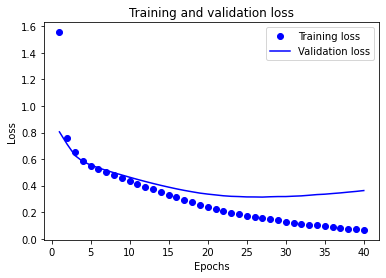

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see that training and validation loss are similar early in the fitting. However, as fitting continues and overfitting sets in, training and validation loss diverge from each other. Training loss continues to fall consistently. However, once overfitting happens, the validation loss no longer falls and eventually begins to increase a bit. Early stopping, which we saw earlier in this course, can prevent some overfitting.

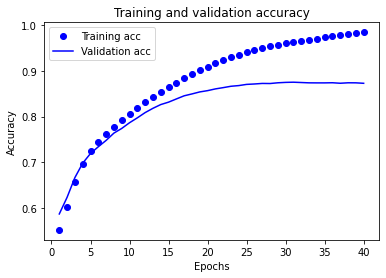

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The accuracy graph tells a similar story. Now let's repeat the fitting with early stopping. We begin by creating an early stopping monitor and restoring the network's weights to random. Once this is complete, we can fit the neural network with the early stopping monitor enabled.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

model.set_weights(init_weights)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    callbacks=[monitor],
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 38ms/step - loss: 1.1912 - accuracy: 0.5643 - val_loss: 0.7129 - val_accuracy: 0.6332
Epoch 2/40
30/30 [==============================] - 1s 37ms/step - loss: 0.6202 - accuracy: 0.6749 - val_loss: 0.5862 - val_accuracy: 0.6922
Epoch 3/40
30/30 [==============================] - 1s 37ms/step - loss: 0.5531 - accuracy: 0.7251 - val_loss: 0.5525 - val_accuracy: 0.7208
Epoch 4/40
30/30 [==============================] - 1s 36ms/step - loss: 0.5228 - accuracy: 0.7483 - val_loss: 0.5308 - val_accuracy: 0.7403
Epoch 5/40
30/30 [==============================] - 1s 38ms/step - loss: 0.4981 - accuracy: 0.7671 - val_loss: 0.5106 - val_accuracy: 0.7569
Epoch 6/40
30/30 [==============================] - 1s 38ms/step - loss: 0.4754 - accuracy: 0.7823 - val_loss: 0.4925 - val_accuracy: 0.7690
Epoch 7/40
30/30 [==============================] - 1s 37ms/step - loss: 0.4542 - accuracy: 0.7959 - val_loss: 0.4759 - val_accuracy: 0.7803
Epoch 8/40
30

The training history chart is now shorter because we stopped earlier.

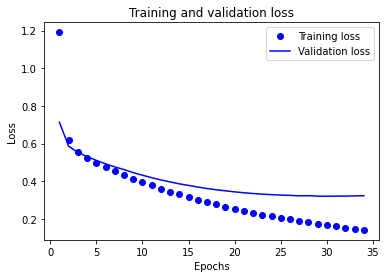

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Finally, we evaluate the accuracy for the best neural network before early stopping occured.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

pred = model.predict(x_val)
# Use 0.5 as the threshold
predict_classes = pred.flatten()>0.5

correct = accuracy_score(y_val,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.8685
